In [1]:
#import
import numpy as np
import math
import scipy
import seaborn as sns
import pandas as pd 
import statsmodels as sm
import matplotlib.pyplot  as  plt
import datetime
import sklearn

In [3]:
import os, sys 
#to be able to interact with Google Drive's operating system
from google.colab import drive 
#drive is a module that allows us use Python to interact with google drive
drive.mount('/content/gdrive') 
#mounting google drive allows us to work with its contents
nb_path = '../content/notebooks'
sys.path.insert(0, nb_path)  # or append(nb_path)
#The last three lines are what changes the path of the file.

Mounted at /content/gdrive


In [4]:
!pip install --target=$nb_path pmdarima

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 12.7 MB/s 
     |████████████████████████████████| 11.3 MB 39.4 MB/s 
     |████████████████████████████████| 946 kB 52.4 MB/s 
     |████████████████████████████████| 23.1 MB 1.4 MB/s 
     |████████████████████████████████| 2.0 MB 37.8 MB/s 
     |████████████████████████████████| 306 kB 72.8 MB/s 
     |████████████████████████████████| 138 kB 57.5 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 15.7 MB 193 kB/s 
     |████████████████████████████████| 247 kB 62.2 MB/s 
     |████████████████████████████████| 503 kB 57.8 MB/s 
     |████████████████████████████████| 233 kB 61.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which

In [5]:
from pmdarima.arima import auto_arima

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#read and plot Melbourne minimum temperatures csv
champagne_sales=pd.read_csv('/content/sample_data/Champagne_Sales.csv', header = 0)

# Print first five 
champagne_sales.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [ ]:
# see minimum_temp information
champagne_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            105 non-null    object
 1   Champagne sales  105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
#Here we need to change colome Month to index
champagne_sales['Month'] = pd.to_datetime(champagne_sales['Month'])
champagne_sales.set_index('Month',inplace=True)
champagne_sales.head()

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [ ]:
champagne_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Champagne sales  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


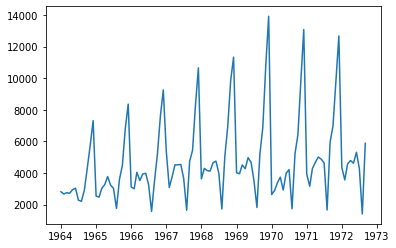

In [ ]:
#plot the data
plt.plot(champagne_sales)
plt.show()

In [ ]:
#seperate training data set and testing data set
#total 105 rows, use first 80% (84) to train and last 20% (21) to test
cs_train = champagne_sales.iloc[:84,:]
cs_test = champagne_sales.iloc[84:,:]

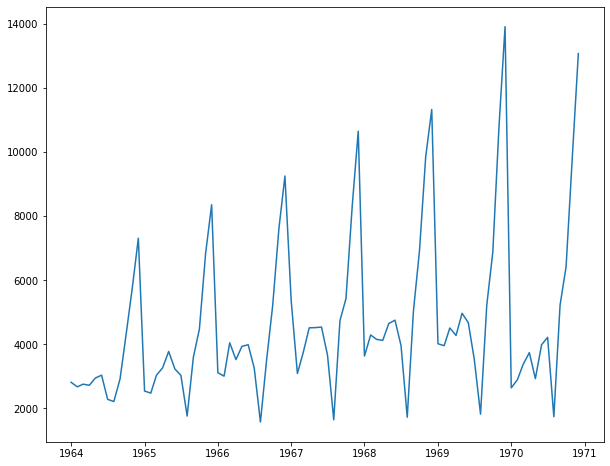

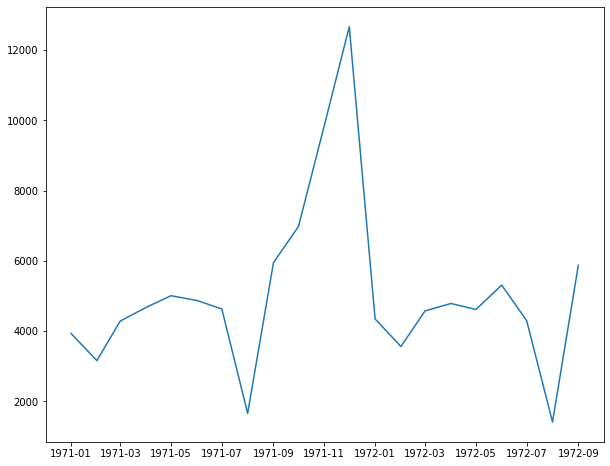

In [ ]:
#plot the test and train data
plt.figure(figsize=(10,8))
plt.plot(cs_train)
plt.show()
plt.figure(figsize=(10,8))
plt.plot(cs_test)
plt.show()

**First algorithm: ARIMA**

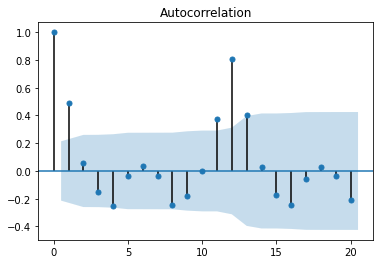

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


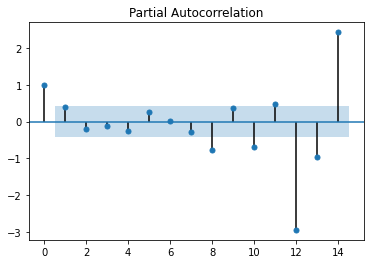

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(cs_train, alpha=0.05)
plt.show()
plot_pacf(cs_test, alpha=0.05)
plt.show()

In [ ]:
# due to no trend so I only need to use ARMA model instead of ARIMA
arima_model = auto_arima(cs_train,trace=True, seasonal=True, D=1,m=12)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1160.006, Time=1.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1183.693, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1173.736, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1157.042, Time=0.45 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1155.109, Time=0.09 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1157.009, Time=0.35 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1158.348, Time=0.93 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1155.379, Time=0.17 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1155.138, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1173.612, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1155.790, Time=0.26 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 4.507 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -575.554
Date:                            Mon, 11 Oct 2021   AIC                           1155.109
Time:                                    02:51:16   BIC                           1159.634
Sample:                                         0   HQIC                          1156.908
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8756      0.060    -14.663      0.000      -0.993      -0.759
sigma2       5.86e+05   7.15e+04      8.195      0.000    4.46e+05    7.26e+05
===================================================================================
Ljung-Box (Q):                       51.39   Jarque-Bera (JB):                 6.95
Prob(Q):                              0.11   Prob(JB):                         0.03
Heteroskedasticity (H):               2.13   Skew:                             0.01
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#predice data
arima_pred = pd.DataFrame(arima_model.predict(n_periods=21),index=cs_test.index)
arima_pred.columns = ['Champagne sales']
arima_pred

,Champagne sales
Month,
1971-01-01,2260.640734
1971-02-01,2520.640734
1971-03-01,2991.640734
1971-04-01,3361.640734
1971-05-01,2548.640734
1971-06-01,3607.640734
1971-07-01,3838.640734
1971-08-01,1359.640734
1971-09-01,4842.640734


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


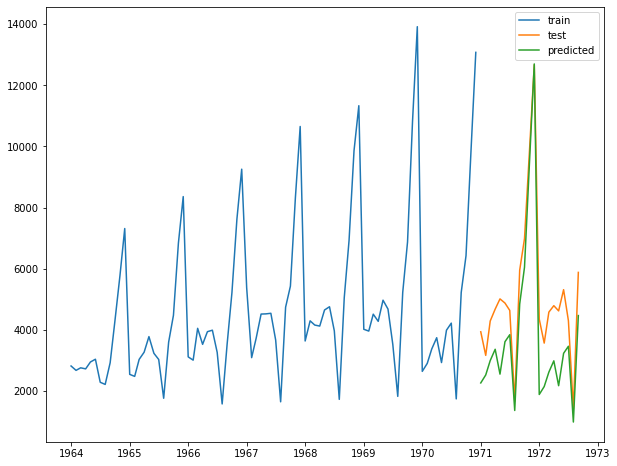

In [ ]:
#plot actrual and predect data
plt.figure(figsize=(10,8))
plt.plot(cs_train,label="train")
plt.plot(cs_test,label="test")
plt.plot(arima_pred,label="predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [ ]:
#evaluate matrix
#r2
sklearn.metrics.r2_score(cs_test['Champagne sales'], arima_pred['Champagne sales'])

0.6212736909948076

In [ ]:
#mean_absolute_percentage_error
sklearn.metrics.mean_absolute_error(cs_test['Champagne sales'], arima_pred['Champagne sales'])

0.29099678393381

In [ ]:
#rmse
math.sqrt(sklearn.metrics.mean_squared_error(cs_test['Champagne sales'], arima_pred['Champagne sales']))

1474.8421333859212

**Reload data**

In [76]:
from sklearn.preprocessing import MinMaxScaler
champagne_sales_df=pd.read_csv('/content/sample_data/Champagne_Sales.csv', usecols=[1], engine='python')
champagne_sales = champagne_sales_df.values
champagne_sales = champagne_sales.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
champagne_sales = scaler.fit_transform(champagne_sales)
champagne_sales[:5]

array([[0.11213309],
       [0.10069584],
       [0.10733425],
       [0.10461489],
       [0.12261058]], dtype=float32)

In [103]:
cs_train = champagne_sales[:84,:]
cs_test = champagne_sales[84:,:]
print(len(cs_train), len(cs_test))

84 21


In [78]:
#Converting array of matrix into a dataset matrix
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return np.array(dataX), np.array(dataY)   

In [96]:
#seperate train and test data
n_steps = 12   
X_train, y_train = create_dataset(cs_train, n_steps)
X_test, y_test = create_dataset(cs_test, n_steps)

**Second algorithm: SVR**

In [97]:
#run defualt SVR model
from sklearn.svm import SVR
SVR_model = SVR(kernel='rbf')
SVR_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [98]:
#get predicet data
svr_pred = SVR_model.predict(X_test)
print(svr_pred)

[0.18252786 0.21252186 0.24542577 0.27555366 0.22631919 0.30718712
 0.28349635 0.12843886 0.28767455 0.35903186 0.59729823 0.89985558
 0.18172589 0.20643497 0.24794044 0.28224616 0.24310837 0.31173987
 0.28503111 0.13769913]


In [99]:
pred_df=pd.DataFrame(svr_pred, y_test).reset_index()
pred_df_svr = pred_df.rename(columns={'index': 'Predictions', 0: 'True_values'})
pred_df_svr.head()

,Predictions,True_values
0,0.201632,0.182528
1,0.139886,0.212522
2,0.229785,0.245426
3,0.260977,0.275554
4,0.287691,0.226319


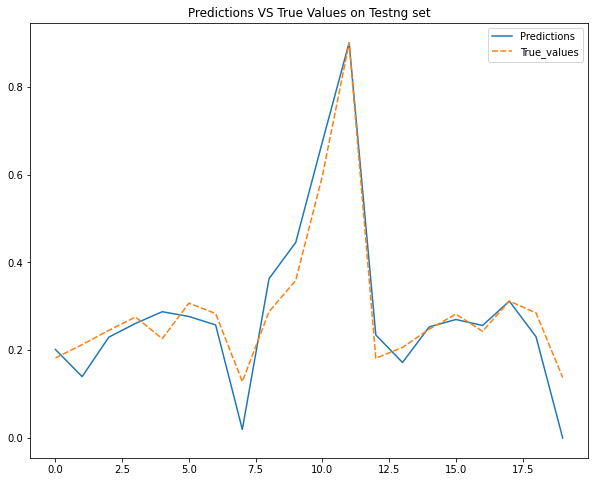

In [68]:
#plot actrual and predect data
plt.figure(figsize=(10,8))
sns.lineplot(data= pred_df_svr)
plt.title("Predictions VS True Values on Testng set")
plt.show()

In [83]:
#evaluate matrix
#r2
sklearn.metrics.r2_score(svr_pred, y_test)

-0.09635724776888477

In [84]:
print("accuracy  on training set",SVR_model.score(X_train, y_train))

accuracy  on training set 0.8889916551582812


In [85]:
#Score
print("accuracy  on Testing set",SVR_model.score(X_test, y_test))

accuracy  on Testing set 0.5913839039187909


In [86]:
sklearn.metrics.mean_absolute_error(svr_pred, y_test)

0.03877060073282135

**Third algorithm: Linear Regression**

In [100]:
#fit LR model
from sklearn.linear_model import LinearRegression
LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
#LR model predict
LR_pred = LR_Model.predict(X_test)
LR_pred.shape, y_test.shape

((20,), (20,))

In [102]:
pred_df=pd.DataFrame(LR_pred, y_test).reset_index()
pred_df_new = pred_df.rename(columns={'index': 'Predictions', 0: 'True_values'})
pred_df_new.head()

,Predictions,True_values
0,0.201632,0.100008
1,0.139886,0.081861
2,0.229785,0.142758
3,0.260977,0.173630
4,0.287691,0.091473


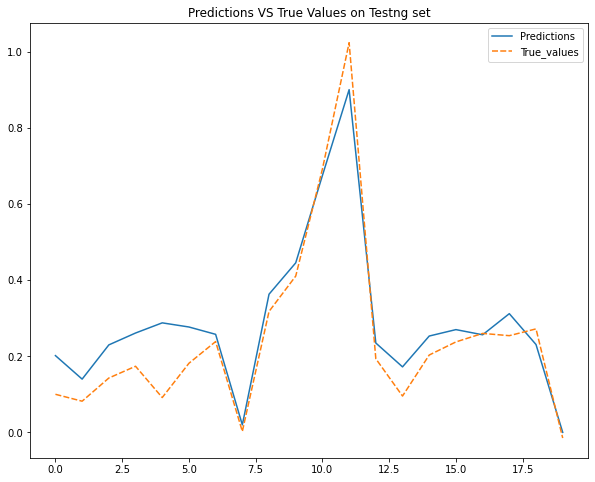

In [104]:
#plot actrual and predect data
plt.figure(figsize=(10,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testng set")
plt.show()

In [91]:
#evaluate matrix
#r2
sklearn.metrics.r2_score(LR_pred, y_test)

0.7626101798037601

In [92]:
print("Acuurancy on training set",LR_Model.score(X_train, y_train))

Acuurancy on training set 0.9207738267399553


In [93]:
#Score
print("Acuraccy on Testing set",LR_Model.score(X_test, y_test))

Acuraccy on Testing set 0.7449743240117824


In [94]:
sklearn.metrics.mean_absolute_error(LR_pred, y_test)

0.039707325